In [47]:
#importing packages for data manuplation
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import sys
sys.path.insert(0,'../scripts_/')
from HypothesisPlot import HypothesisPlot
from DistributionPlots import DistributionPlots

In [48]:
sys.path.append(os.path.abspath(os.path.join('data')))

## Task 1: A/B testing framework

### Data Preparation

In [49]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [50]:
df.shape

(8077, 9)

In [51]:
from data_cleaning import DataCleaning 

In [52]:
#creating an object
data=DataCleaning(df)

In [53]:
#check if the data has null values
data.percent_missing(df)
df.head()

The Telecom dataset contains 0.0 % missing values.


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


>Our dataset has no missing value and ready for further exploration.

In [54]:
#check if it have duplicate user id
data.unique_users(df)
df.head()

The data has 0 repeated users.


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [56]:
#categorical vs. numerical
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


In [57]:
if(df.nunique()['auction_id']==8077):
    print("no repeated impression id")

no repeated impression id


In [58]:
aggregat_contorl = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['control']
aggregat_exposed  = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['exposed']

print(f"users that belong to control group is {aggregat_contorl}")
print(f"users that belong to exposed group is {aggregat_exposed}")

users that belong to control group is 4071
users that belong to exposed group is 4006


>4071 users from the experiment are control group while,4006 are from the belong to exposed group

* if both section of yes and no is 0, then the users didn't answered
* let us filter out those who answered either yes or no

In [59]:
answered = df.query('yes==1 or no==1')
print(f"There are {answered.shape[0]} rows and {answered.shape[1]} columns")

There are 1243 rows and 9 columns


* plots of people who answered yes or no

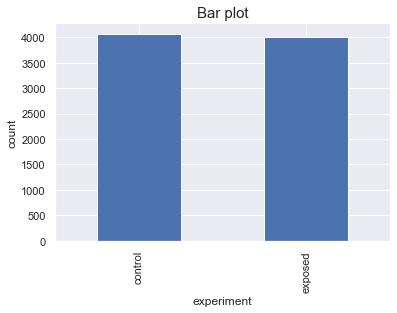

In [60]:
#Visualizing experiment using barplot
sns.set()
df['experiment'].value_counts().plot(kind='bar')
plt.title('Bar plot',fontsize=15)
plt.xlabel('experiment',fontsize=12),plt.ylabel('count',fontsize=12)
plt.show()


>The number of exposed users and controled users are very close

### Task 1.1: Understanding A/B testing framework 

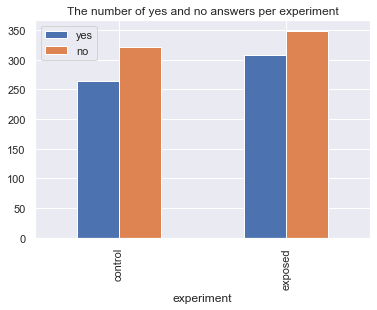

Number of users who repsonded positively in the controled group are 264
while 322 who responded negatively
Number of users who repsonded positively in the exposed group are 308
while 349 who responded negatively


In [61]:
# Identifying the exposed group and control group
exposed_df = df[df['experiment'] == 'exposed']

control_df = df[df['experiment'] == 'control']

aggr_response = df.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'}).plot(kind='bar')
plt.title("The number of yes and no answers per experiment")
plt.show()

#get users who repsonded positively in the exposed group
control_df_pos_response = control_df[control_df['yes'] == 1]
control_df_neg_response = control_df[control_df['no'] == 1]
#get users who repsonded positively in the exposed group
exposed_pos_response = exposed_df[exposed_df['yes'] == 1]
exposed_df_neg_response = exposed_df[exposed_df['no'] == 1]

print(f"Number of users who repsonded positively in the controled group are {control_df_pos_response.shape[0]}")
print(f"while {control_df_neg_response.shape[0]} who responded negatively")


print(f"Number of users who repsonded positively in the exposed group are {exposed_pos_response.shape[0]}")
print(f"while {exposed_df_neg_response.shape[0]} who responded negatively")

>Those that are from exposed group responeded in greater number than controled goups.
>>264 Users responded postiviely to the dummy Ad from the total 586 Users who responded. <br>
>>308 Users responded postively to the creative ad that was designed by SmartAd from the total 657 Users who responeded.

In [62]:
 #All users who answered yes
yes_df = control_df[control_df['yes'] == 1].append(exposed_df[exposed_df['yes'] == 1])
yes_df = yes_df.drop(['yes','no'], axis = 1)
yes_df['response'] = 1
#All users who answered no
no_df = control_df[control_df['no'] == 1].append(exposed_df[exposed_df['no'] == 1])
no_df = no_df.drop(['yes','no'], axis = 1)
no_df['response'] = 0
#Final Combined dataframe will be
combined_df = yes_df.append(no_df)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,63b92003-b823-44b6-b5aa-e417668f02ec,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,0
1,3aa89a92-a9c2-463b-86a0-8c9f6760e735,exposed,2020-07-04,19,Generic Smartphone,6,Chrome Mobile,1
2,1862cede-8050-4913-a9f0-45381c323c9e,control,2020-07-03,15,STF-L09,6,Facebook,0
3,3de1f29e-6f1a-49c7-8e41-96781b228f37,control,2020-07-05,5,Generic Smartphone,6,Chrome Mobile,0
4,8fcc1807-2048-42c8-be64-e5ce4e00f23d,exposed,2020-07-03,10,EVR-N29,6,Chrome Mobile WebView,0


>All user that responded 'yes' are assigned to 1<br>
>All user that responded 'no' are assigned to 0<br>
>The results then assigned to response column for better analysis

#### Grouping the results by hour

In [63]:
hour_data = combined_df.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['Number of users']
hour_data = hour_data.reset_index()
hour_data

,hour,Number of users
0,0,31
1,1,32
2,2,33
3,3,44
4,4,46
5,5,49
6,6,50
7,7,59
8,8,67
9,9,57


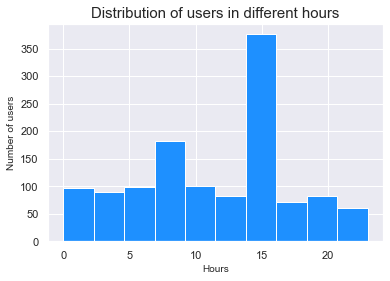

In [64]:
combined_df['hour'].hist(color='dodgerblue')
plt.xlabel('Hours',fontsize=10)
plt.ylabel('Number of users',fontsize=10)
plt.title('Distribution of users in different hours',fontsize=15)
plt.show()

>Highest number of users were recorded at the 15th hour

#### Grouping the result by browser

In [65]:
browser_group_df = combined_df.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
browser_group_df

,experiment,hour,response
browser,,,
Chrome,2,27,1
Chrome Mobile,695,8041,314
Chrome Mobile WebView,227,2403,116
Chrome Mobile iOS,1,11,1
Facebook,156,1957,69
Mobile Safari,14,123,4
Mobile Safari UI/WKWebView,3,46,0
Samsung Internet,145,1712,67


>Highest number of response were recorded on Chrome mobile

* PLOT OF USED BROWSERS

Text(0.5, 1.0, 'Used Browsers')

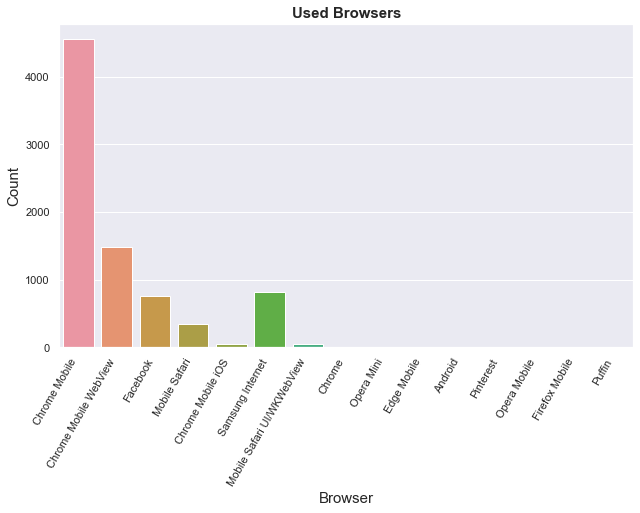

In [66]:
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browser', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Used Browsers', fontsize=15, fontweight='bold')

#### Grouping the result by date

In [20]:
date_group_df = combined_df.groupby('date').agg({'experiment':'count','hour':'sum','response':'sum'})
date_group_df

,experiment,hour,response
date,,,
2020-07-03,325,4215,147
2020-07-04,159,1694,76
2020-07-05,117,1124,52
2020-07-06,74,417,35
2020-07-07,83,934,38
2020-07-08,177,2817,85
2020-07-09,184,2179,85
2020-07-10,124,940,54


>147 responeses were recorded on date 2020-07-03<br>


* PLOT FOR DATE

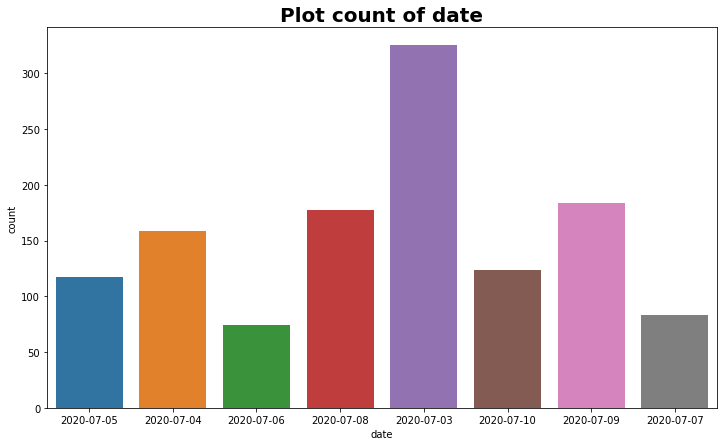

In [15]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
plot_count(answered, 'date')

* Most of the data was collected on the first date

#### Grouping the result by device

In [21]:
date_group_df = combined_df.groupby('device_make').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
date_group_df.head(15)

,experiment,hour,response
device_make,,,
A0001,1,9,1
ANE-LX1,6,66,3
CLT-L09,5,58,0
DLI-L22,1,10,0
E5823,1,2,0
ELE-L09,4,47,3
ELE-L29,2,22,1
EML-L09,1,15,0
EVA-L09,1,21,1


>Highest number of response were recorded by different device

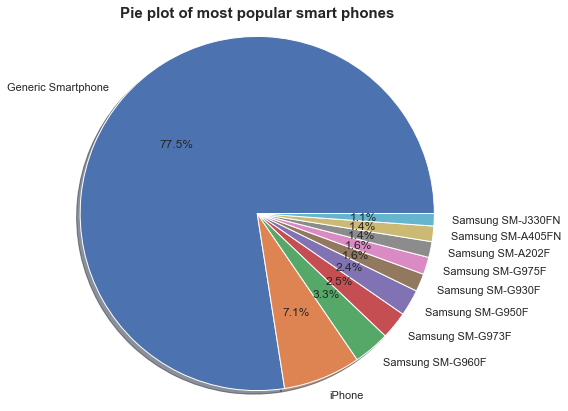

In [22]:
top_10 = df['device_make'].value_counts().nlargest(10)
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie plot of most popular smart phones', fontsize=15, fontweight='bold')
plt.show()

* From the graph we can see that the version of smartphones used are not known

### Task 1.2:Classical A/B Testing 

* CORRELATION ANALYSIS

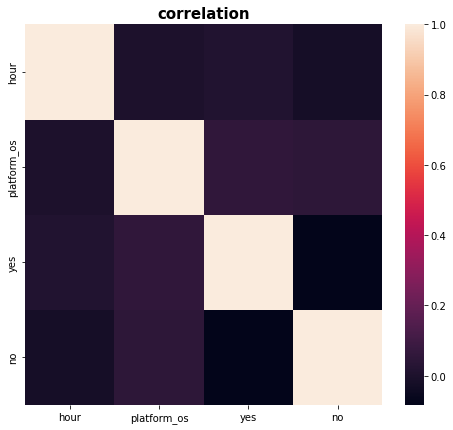

In [17]:
plt.figure(figsize=(8, 7))
corr = df.corr()
sns.heatmap(corr)
plt.title('correlation', fontsize=15, fontweight='bold')
plt.show()

* COMPARE THE TWO GROUPS

In [18]:
ab_summary = answered.pivot_table(values='yes', index='experiment', aggfunc=np.sum)
ab_summary['total'] = answered.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))
ab_summary['no']=ab_summary['total']-ab_summary['yes']
ab_summary['baseline rate'] = answered.pivot_table(values='yes', index='experiment')
ab_summary

,yes,total,no,baseline rate
experiment,,,,
control,264,586,322,0.450512
exposed,308,657,349,0.468798


* The baseline rate is calculated by taking the number of conversions(yes) and dividing that by the number of social interaction(total saying yes and no)
* The conversion rate between control and exposed group is 0.018

* PLOT OF AWARE

In [19]:
from scipy.stats import binom
control_plot = ab_summary['yes']['control']/ab_summary['total']['control']
exposed_plot = ab_summary['yes']['exposed']/ab_summary['total']['exposed']
tot_exp_plot = ab_summary['total']['exposed']
tot_cont_plot = ab_summary['total']['control']
cont_aware = ab_summary['yes']['control']
exp_aware = ab_summary['yes']['exposed']

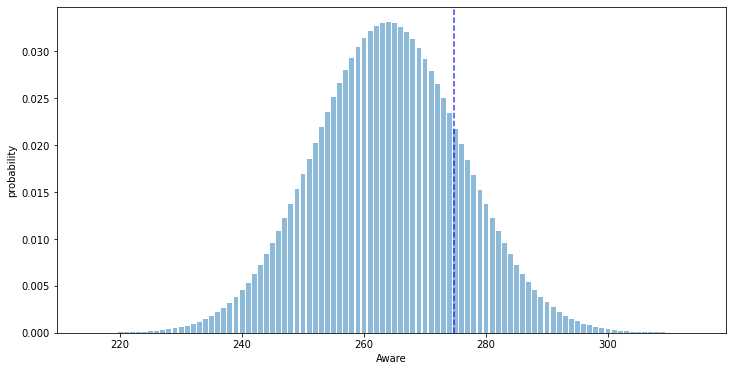

In [20]:
#plot of aware
DP = DistributionPlots()
HPP = HypothesisPlot()
DP.cont_distribution(cont_aware, tot_cont_plot, control_plot, exposed_plot)

* the result from the exposed group in the above plot is indicated by the blue dashline

* PLOT OF THE TWO GROUPS

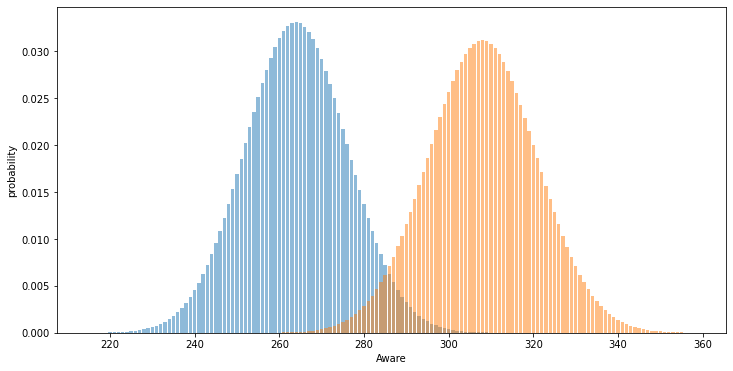

In [21]:
#plot of aware in exposed and controlled
DP.cont_exp_distribution(cont_aware, exp_aware, tot_cont_plot, tot_exp_plot, control_plot, exposed_plot) 

* we can see that the controlled group converted more than the exposed group

* STANDARD ERROR OF MEAN FOR BOTH GROUPS

* to calculate the standard error of mean we need to understand what CLT theorem is
* CLT theorem suggests that by calculating mean of many samples we can calculate the true mean of the population(the data which the control group was taken)
* So standard error of the mean indicates how different the population mean is likely to be from the sample mean

In [22]:
SE_control = np.sqrt(control_plot * (1-control_plot)) / np.sqrt(tot_cont_plot)
SE_exposed = np.sqrt(exposed_plot * (1-exposed_plot)) / np.sqrt(tot_exp_plot)

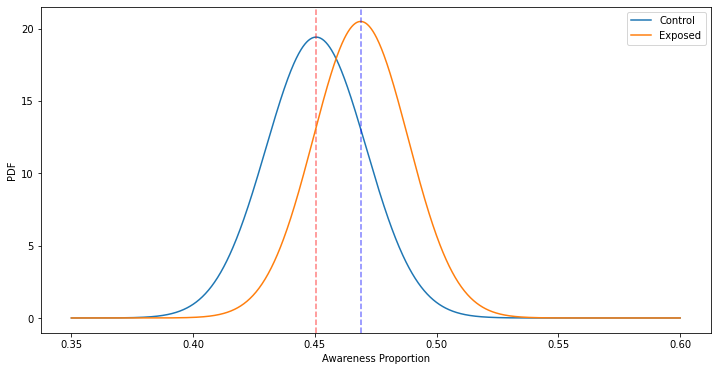

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
x = np.linspace(.35, .6, 1000)

yC = scs.norm(control_plot, SE_control).pdf(x)
ax.plot(x, yC, label='Control')
ax.axvline(x=control_plot, c='red', alpha=0.5, linestyle='--')

yE = scs.norm(exposed_plot, SE_exposed).pdf(x)
ax.plot(x, yE, label='Exposed')
ax.axvline(x=exposed_plot, c='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Awareness Proportion')
plt.ylabel('PDF')
plt.show()


* the dash lines represents the mean conversion rates for the control and exposed group

 VARIANCE OF THE SUM

* A basic property of variance is that the variance of the sum of two random independent variables is the sum of the variances.

* This means that the null hypothesis and alternative hypothesis will have the same variance, which will be, the sum of the variances for the control group and the test group.

In [24]:
#calculate variance of sum
var_cont = np.sqrt(control_plot * (1 - control_plot) / tot_cont_plot)
var_exp = np.sqrt(exposed_plot * (1 - exposed_plot) / tot_exp_plot)
var_cont, var_exp

(0.02055339057798332, 0.019468837373132736)

 NULL HYPOTHESIS VS. ALTERNATIVE HYPOTHESIS

* Null hypothesis(H0) suggests that there is no difference in brand awareness between conrolled and exposed group
* Alternative hypothesis(H1) suggests a difference in brand awarness